In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [6]:
# Load dataset (adjust the path if needed)
df = pd.read_csv("tweet.csv", encoding="latin-1", header=None)

# Assign column names
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Map target sentiment: 0 = negative, 4 = positive → map to 0 and 1
df['target'] = df['target'].map({0: 0, 4: 1})

df = df.sample(10000, random_state=42)

X = df['text']
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.8035

Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.97      0.88      1537
    Positive       0.73      0.24      0.36       463

    accuracy                           0.80      2000
   macro avg       0.77      0.61      0.62      2000
weighted avg       0.79      0.80      0.76      2000



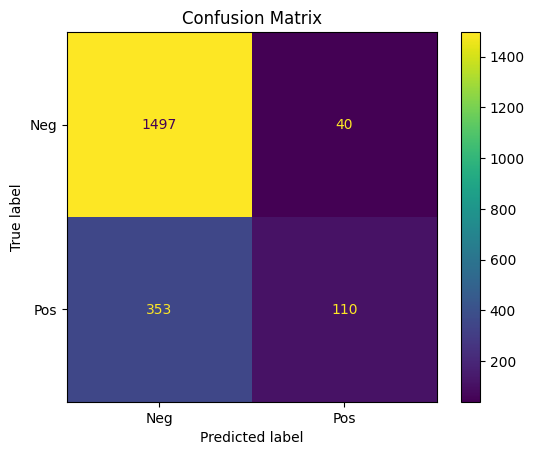

In [9]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Neg", "Pos"])
plt.title("Confusion Matrix")
plt.show()

In [11]:
new_texts = [
    "I really love this phone, it's amazing!",
    "This is the worst service I’ve ever used."
]

new_tfidf = vectorizer.transform(new_texts)
predictions = model.predict(new_tfidf)

for text, label in zip(new_texts, predictions):
    print(f"'{text}' → {'Neg' if label else 'Pos'}")

'I really love this phone, it's amazing!' → Pos
'This is the worst service I’ve ever used.' → Pos
